# 1.Imports

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

2023-04-05 12:09:34.973914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2.MNIST Loading

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3.Examples

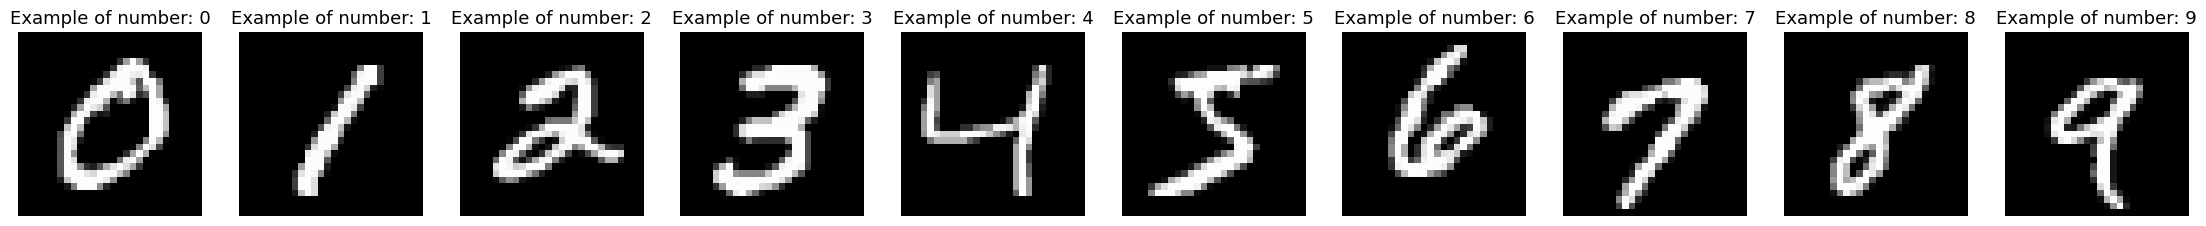

In [3]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(28, 28))

for i in range (0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Example of number: {}".format(i), fontsize=13)
    ax[i].axis('off')

# 4.Data preparation

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

#Reshape
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 5.Model

In [5]:
model = Sequential()
model.add(Dense(units = 128, input_shape=(784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

loss_fn = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam()

model.compile(loss = loss_fn, optimizer = optimizer, metrics=['acc'])
model.summary()

2023-04-05 12:09:49.200199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 12:09:49.200455: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 6.Training

In [6]:
batch_size = 256
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
             validation_data=(x_test, y_test), validation_split=0.2, shuffle=True) 

Epoch 1/15
235/235 [==============================] - 17s 14ms/step - loss: 0.4462 - acc: 0.8716 - val_loss: 0.1741 - val_acc: 0.9474
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1782 - acc: 0.9479 - val_loss: 0.1247 - val_acc: 0.9630
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1269 - acc: 0.9634 - val_loss: 0.1058 - val_acc: 0.9686
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1003 - acc: 0.9701 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 5/15
235/235 [==============================] - 4s 16ms/step - loss: 0.0811 - acc: 0.9764 - val_loss: 0.0867 - val_acc: 0.9725
Epoch 6/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0683 - acc: 0.9793 - val_loss: 0.0789 - val_acc: 0.9767
Epoch 7/15
235/235 [==============================] - 2s 10ms/step - loss: 0.0561 - acc: 0.9831 - val_loss: 0.0738 - val_acc: 0.9780
Epoch 8/15
235/235 [==============================] - 3s 11ms/step -

# 7.Score

313/313 [==============================] - 3s 8ms/step - loss: 0.0710 - acc: 0.9800
Test Loss: 0.07102666795253754
Test Accuracy: 0.9800000190734863


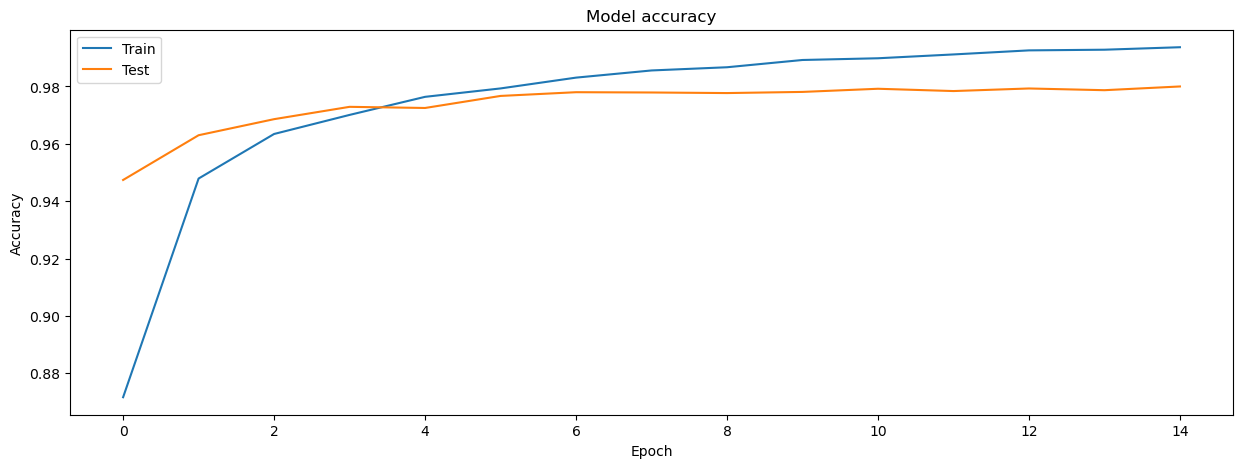

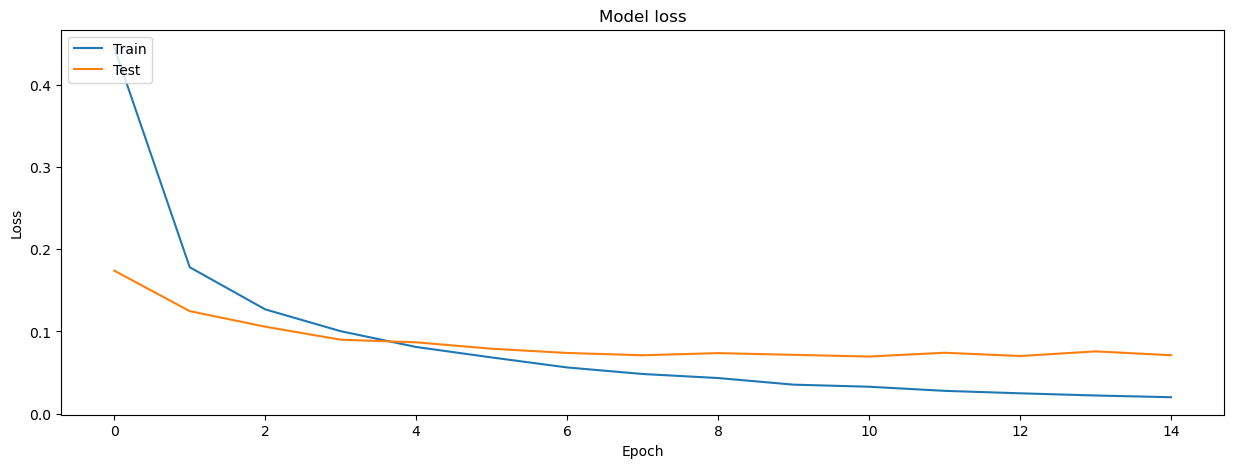

313/313 [==============================] - 3s 9ms/step


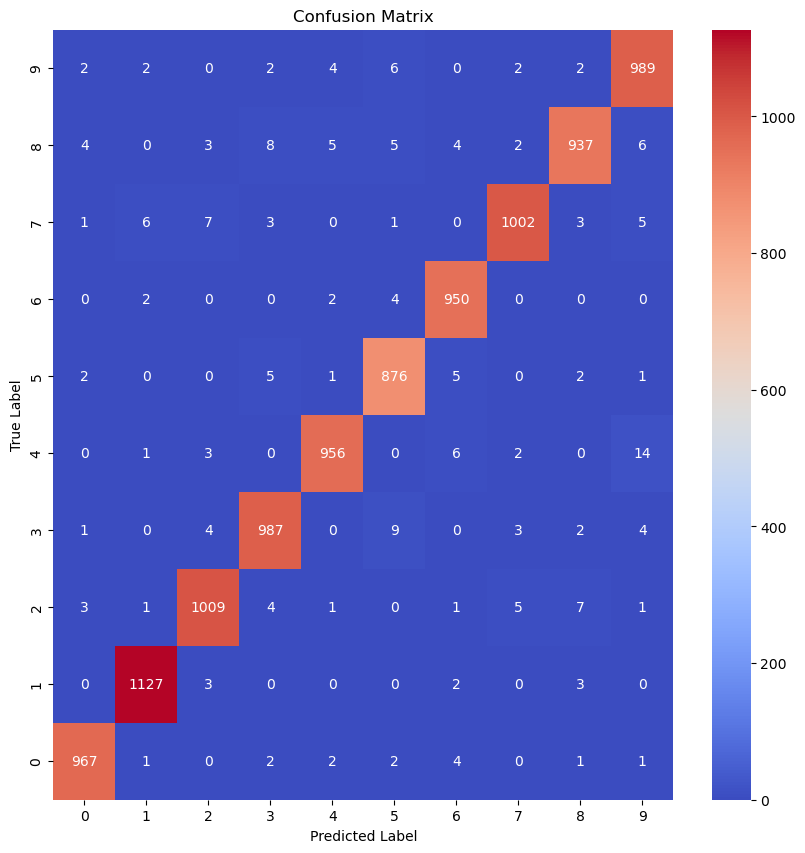

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Number of misclassified examples:  200


In [7]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

#acc plot
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc ='upper left')
plt.show()

#Confusion Matrix
y_pred_test = model.predict(x_test)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(num_classes, num_classes))
hm = sns.heatmap(matrix, cmap='coolwarm', annot=True,fmt='d')
hm.set_ylim(0, len(matrix))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#Classification report
print(classification_report(max_y_test, max_y_pred_test))

#Misclassified 
classcheck = max_y_test - max_y_pred_test
misclassified = np.where(classcheck != 0)[0]
num_misclassified = len(misclassified)

print('Number of misclassified examples: ', str(num_misclassified))